In [2]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
# import visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

C:\Users\James\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# load in data
data = pd.DataFrame.from_csv(r"C:\Users\James\Documents\car.csv",index_col=None)


After reading in the data, I'd like to see if this dataset is clean, or if I need to remove any particular entries. Since I want to predict the make (among U.S., Europe, & Japan), filling the data with an average might prove problematic

In [4]:
#view data
data

,mpg,cylinders,cubicinches,hp,weightlbs,timeto60,year,brand
0,14,8,350,165,"4,209",12,1972,US.
1,32,4,89,71,"1,925",14,1980,Europe.
2,17,8,302,140,"3,449",11,1971,US.
3,15,8,400,150,"3,761",10,1971,US.
4,31,4,98,63,"2,051",17,1978,US.
5,23,8,350,125,"3,900",17,1980,US.
6,13,8,351,158,"4,363",13,1974,US.
7,14,8,440,215,"4,312",9,1971,US.
8,25,5,183,77,"3,530",20,1980,Europe.
9,38,4,89,62,"2,050",17,1982,Japan.


Plotting data to look at the distribution of characteristics

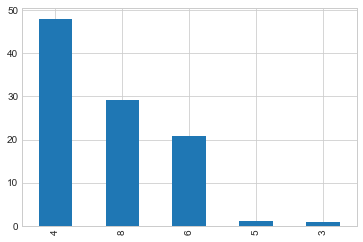

In [25]:
data.describe()
cyl = data.cylinders.value_counts() / data.cylinders.shape[0]*100
cyl.plot(kind='bar')

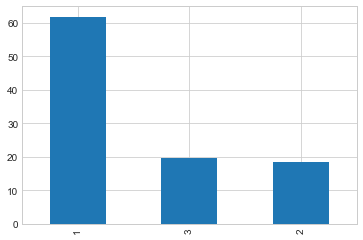

In [26]:
brand = data.brand.value_counts() / data.brand.shape[0]*100
brand.plot(kind='bar')

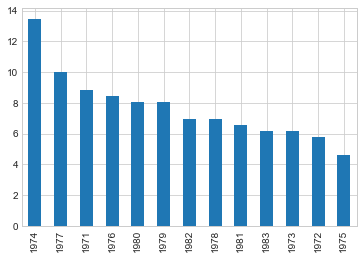

In [27]:
yr = data.year.value_counts() / data.year.shape[0]*100
yr.plot(kind='bar')

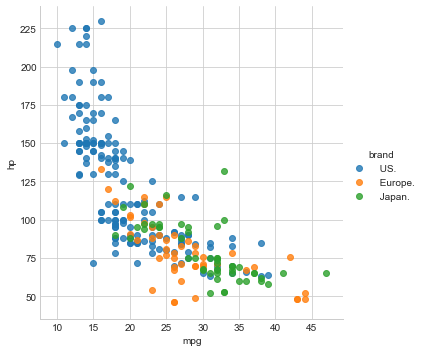

In [6]:
# establish visualization patterns and create a basic scatter plot
sn.set_style("whitegrid")
sn.lmplot(x="mpg",y="hp",data=data,fit_reg=False,scatter=True,hue="brand")


From this scatter plot, it looks like U.S. cars are more powerful, but European & Japanese cars are more efficient. I will create several plots to determine which factors are related, and thus should be excluded from the classification model.

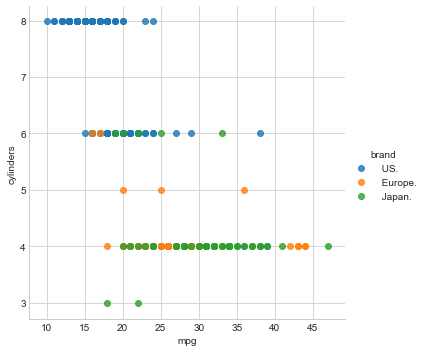

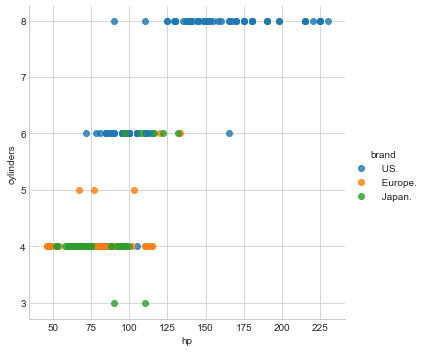

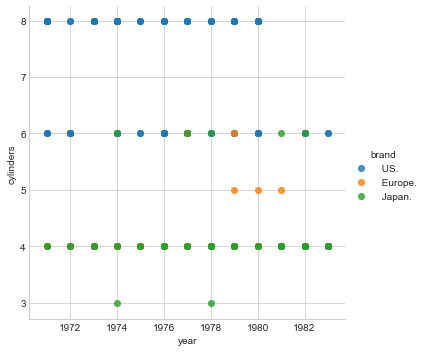

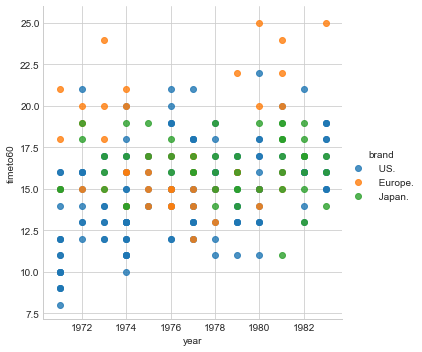

In [7]:
sn.lmplot(x="mpg",y="cylinders",data=data,fit_reg=False,scatter=True,hue="brand")
sn.lmplot(x="hp",y="cylinders",data=data,fit_reg=False,scatter=True,hue="brand")
sn.lmplot(x="year",y="cylinders",data=data,fit_reg=False,scatter=True,hue="brand")
sn.lmplot(x="year",y="timeto60",data=data,fit_reg=False,scatter=True,hue="brand")

In [8]:
# Create numerical values to allow for classification methods to work properly
data['brand'].replace(' US.', 1, inplace=True)
data['brand'].replace(' Europe.', 2, inplace=True)
data['brand'].replace(' Japan.', 3, inplace=True)

In [9]:
from sklearn import metrics
x1 = data.loc[:, ['mpg','cylinders']]
y = data.brand
x = x1.values


In [10]:
# split data into training and testing splits
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, y_train.shape)
# fit multinomial model
lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
metrics.accuracy_score(y_train, lr.predict(X_train))
metrics.accuracy_score(y_test, lr.predict(X_test))

(182, 2) (182,)


0.64102564102564108

We will now implement a decision tree algorithm and to compare untuned accuracy (both gini & information gain)

In [11]:
# load appropriate Decision Tree 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
# Create Decision Tree Classifier using "Gini" method
clf_gini = DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth=5,min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [13]:
# Create Decision Tree Classifier using "Information Gain" Method
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth=5,min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [14]:
clf_gini.predict([[27, 4]])

array([1], dtype=int64)

In [15]:
y_pred = clf_gini.predict(X_test)
y_pred

array([3, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 2, 3, 1, 3, 1, 1, 1], dtype=int64)

In [16]:
y_pred_en = clf_entropy.predict(X_test)
y_pred

array([3, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 2, 3, 1, 3, 1, 1, 1], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)*100

73.076923076923066

In [18]:
accuracy_score(y_test, y_pred_en)*100

75.641025641025635

The information gain method for decision tree algorithm worked slightly better than the gini method, but coming in >10% than a multinomial model. Since these are untuned, this gives a good indicator for the type of performance you can expect with this type of data [2 columns - somewhat related, 3 classes]. 